Perceptron - PLR - IRIS classification problem

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [41]:
class Perceptron(object):

  def __init__(self, no_of_inputs, epochs=100, learning_rate=0.01):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)
        self.training_error = []

  def predict(self, inputs):
    net = np.dot(inputs, self.weights[1:])+self.weights[0]
    # step activation function
    if net >= 0:
      activation = 1
    else:
      activation = -1
    return activation

  def train(self, training_inputs, training_labels):
    for _ in range(self.epochs):
      error = 0
      for inputs, label in zip(training_inputs, training_labels):
        prediction = self.predict(inputs)
        loss = label - prediction
        self.weights[1:] += self.learning_rate * loss * inputs
        self.weights[0] += self.learning_rate * loss
        #error += (label - prediction)
        #error += np.abs(label - prediction)
        #error += np.square(label - prediction)
        error += (label - prediction)**2
      self.training_error.append(error)

In [42]:
# test perceptron with IRIS data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
print(df.head())
print("\n\n")
print(df.tail())

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa



       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


In [43]:
# extract first 100 class labels (50 iris-setosa and 50 iris-versicolor)
# Attribute Information: sepal length, sepal width, petal length, petal width in cm and class (Iris Setosa, Iris Versicolour, and Iris Virginica)
x = df.iloc[0:100, [0, 2]].values
y = df.iloc[0:100,4].values
y =np.where(y=='Iris-setosa',1, -1)
print(y)
print(x.ndim)
print(x.shape)
print(x.shape[0])

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]
2
(100, 2)
100


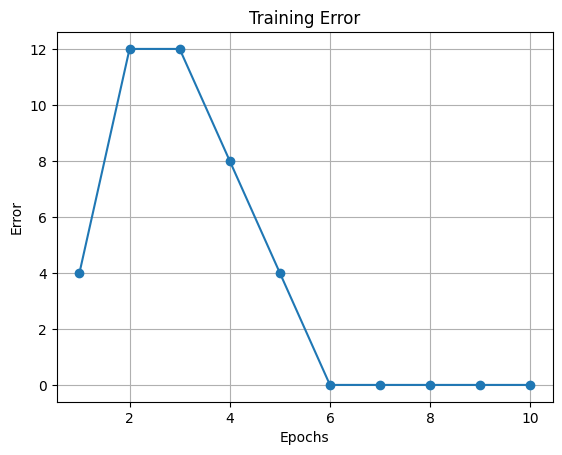

[ 0.04   0.07  -0.184]


In [44]:
from numpy.core.fromnumeric import shape
# use a perceptron to find a decision boundary to separate the two classes.
p = Perceptron(no_of_inputs=2, epochs=10, learning_rate=0.01)

p.train(x, y)

plt.plot(range(1,len(p.training_error)+1), p.training_error, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training Error')
plt.grid()
plt.show()

print(p.weights)    #w[0]=bias w[1:]=weights
pred = []
for t in x:
  pred.append(p.predict(t))

In [45]:
# plot decicion line
x1_min, x1_max = x[:,0].min()-1, x[:,0].max()+1
xx1 = np.arange(x1_min, x1_max, 0.1)
xx2 = -p.weights[1]/p.weights[2] * xx1 - p.weights[0]/p.weights[2]

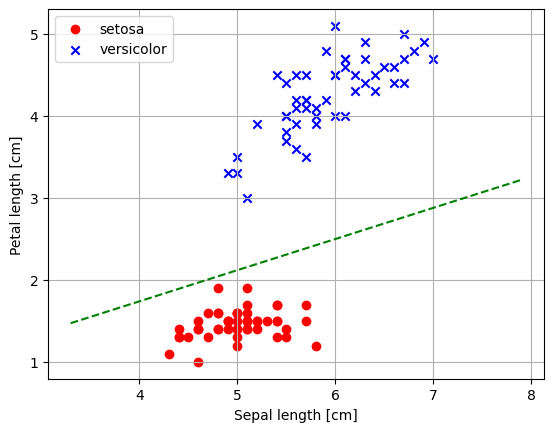

In [46]:
# scatter plot
plt.scatter(x[0:50,0], x[0:50,1], color='red', marker='o', label='setosa')
plt.scatter(x[50:100,0], x[50:100,1], color='blue', marker='x', label='versicolor')
plt.plot(xx1, xx2, 'g--')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [47]:
#print(pred==1)
print(pred)
error = sum(y - pred)/len(y)*100
print('Error = %2.2f %%'  %error)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Error = 0.00 %
